In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
# sns.load_dataset('healthexp')

In [10]:
mpg = sns.load_dataset('mpg')
mpg[:20]

mpg  cylinders  displacement  horsepower  weight  acceleration   
0   18.0          8         307.0       130.0    3504          12.0  \
1   15.0          8         350.0       165.0    3693          11.5   
2   18.0          8         318.0       150.0    3436          11.0   
3   16.0          8         304.0       150.0    3433          12.0   
4   17.0          8         302.0       140.0    3449          10.5   
5   15.0          8         429.0       198.0    4341          10.0   
6   14.0          8         454.0       220.0    4354           9.0   
7   14.0          8         440.0       215.0    4312           8.5   
8   14.0          8         455.0       225.0    4425          10.0   
9   15.0          8         390.0       190.0    3850           8.5   
10  15.0          8         383.0       170.0    3563          10.0   
11  14.0          8         340.0       160.0    3609           8.0   
12  15.0          8         400.0       150.0    3761           9.5   
13  14.0          8         455.0       225.0    3086          10.0   
14  24.0          4         113.0        95.0    2372          15.0   
15  22.0          6         198.0        95.0    2833          15.5   
16  18.0          6         199.0        97.0    2774          15.5   
17  21.0          6         200.0        85.0    2587          16.0   
18  27.0          4          97.0        88.0    2130          14.5   
19  26.0          4          97.0        46.0    1835          20.5   

    model_year  origin                          name  
0           70     usa     chevrolet chevelle malibu  
1           70     usa             buick skylark 320  
2           70     usa            plymouth satellite  
3           70     usa                 amc rebel sst  
4           70     usa                   ford torino  
5           70     usa              ford galaxie 500  
6           70     usa              chevrolet impala  
7           70     usa             plymouth fury iii  
8           70     usa              pontiac catalina  
9           70     usa            amc ambassador dpl  
10          70     usa           dodge challenger se  
11          70     usa            plymouth 'cuda 340  
12          70     usa         chevrolet monte carlo  
13          70     usa       buick estate wagon (sw)  
14          70   japan         toyota corona mark ii  
15          70     usa               plymouth duster  
16          70     usa                    amc hornet  
17          70     usa                 ford maverick  
18          70   japan                  datsun pl510  
19          70  europe  volkswagen 1131 deluxe sedan

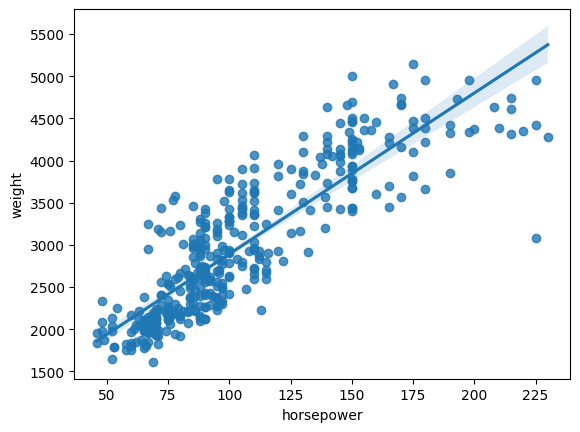

In [11]:
sns.regplot(data=mpg, x='horsepower', y='weight')
plt.show()

In [16]:
correl = mpg.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correl, 
            annot=True, fmt=".3f",
            xticklabels=correl.columns.values,
            yticklabels=correl.columns.values)
plt.show()

ValueError: could not convert string to float: 'usa'

In [19]:
from scipy.stats import pearsonr

mpg = mpg.dropna()
x= mpg['horsepower']
y= mpg['weight']
result = pearsonr(x, y)

print(result)

stat, p = result
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('probability independent')
else:
    print('probability dependent')
    
print(result.confidence_interval())

PearsonRResult(statistic=0.8645377375741445, pvalue=1.364346877372826e-118)
stat=0.865, p=0.000
probability dependent
ConfidenceInterval(low=0.8371778068279874, high=0.8875815463847679)


In [21]:
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [22]:
correlations = iris.corr('pearson', numeric_only=True)
correlations

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

In [ ]:
grid = snsPairgrid(iris, hue='species')
grid.map_upper(sns.regplot)
grid.map_lower(sns.regplot)